In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C://Users/HP/OneDrive/Desktop/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
from sklearn.impute import SimpleImputer
S1 = SimpleImputer(strategy="median",missing_values=0)
df[["Glucose","BloodPressure","SkinThickness","Insulin","Age","BMI"]] = S1.fit_transform(df[["Glucose","BloodPressure","SkinThickness","Insulin","Age","BMI"]])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

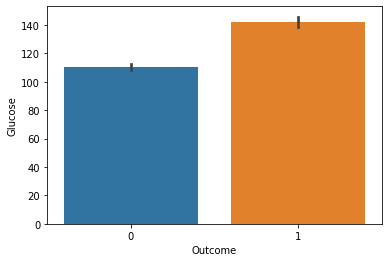

In [6]:
sns.barplot("Outcome","Glucose",data = df)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

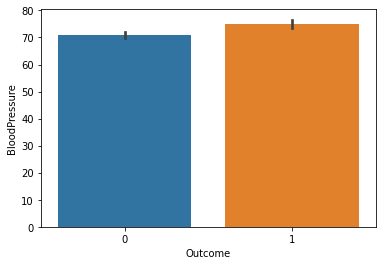

In [7]:
sns.barplot("Outcome","BloodPressure",data = df)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

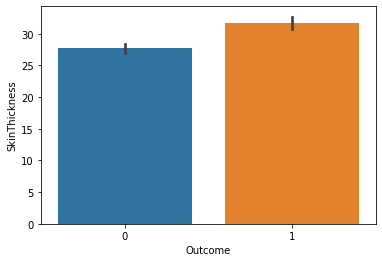

In [8]:
sns.barplot("Outcome","SkinThickness",data = df)

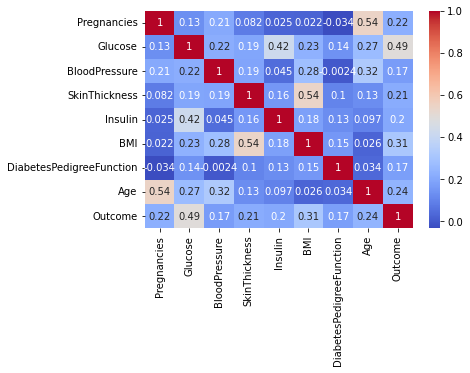

In [9]:
sns.heatmap(df.corr(),cmap = "coolwarm",annot = True)
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.dpi"] = (100)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

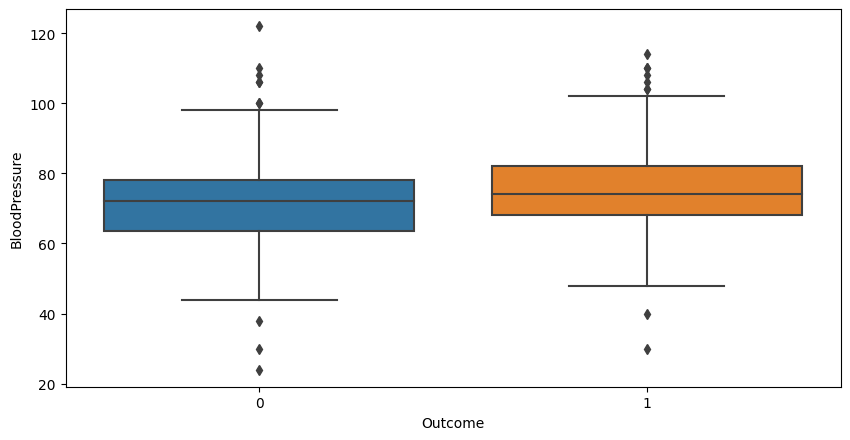

In [10]:
sns.boxplot(y = df["BloodPressure"],x = df["Outcome"])

In [11]:
index2 = df[((df["BloodPressure"] >= 120) & (df["Outcome"] == 0)) | ((df["BloodPressure"] <= 40) & (df["Outcome"] == 1))].index
df.drop(index2,inplace = True)

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,3.857516,121.713725,72.419608,29.083660,140.711111,32.424967,0.469817,33.258824,0.347712
std,3.370155,30.454418,11.830296,8.793489,86.531848,6.819591,0.325263,11.778205,0.476556
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,122.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.371000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.000000,36.500000,0.626000,41.000000,1.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
feature = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

In [14]:
from sklearn.model_selection import train_test_split
x = df.drop("Outcome",axis = 1)
y = df["Outcome"]

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1,stratify=y)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def model(model):
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f"train : {train}\ntest : {test}")
    print(f"accuracy_score : {accuracy_score(ytest,pred)}")
    print(f"confusion_matrix : \n{confusion_matrix(ytest,pred)}")
    print(f"classification_report : \n{classification_report(ytest,pred)}")

In [17]:
model(RandomForestClassifier())

train : 1.0
test : 0.765625
accuracy_score : 0.765625
confusion_matrix : 
[[104  21]
 [ 24  43]]
classification_report : 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       125
           1       0.67      0.64      0.66        67

    accuracy                           0.77       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.76      0.77      0.76       192



In [18]:
from sklearn.tree import DecisionTreeClassifier
model(DecisionTreeClassifier())

train : 1.0
test : 0.6875
accuracy_score : 0.6875
confusion_matrix : 
[[90 35]
 [25 42]]
classification_report : 
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       125
           1       0.55      0.63      0.58        67

    accuracy                           0.69       192
   macro avg       0.66      0.67      0.67       192
weighted avg       0.70      0.69      0.69       192



In [19]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
model(AdaBoostClassifier())

train : 0.8394415357766143
test : 0.75
accuracy_score : 0.75
confusion_matrix : 
[[100  25]
 [ 23  44]]
classification_report : 
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       125
           1       0.64      0.66      0.65        67

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192



In [20]:
model(GradientBoostingClassifier())

train : 0.9301919720767888
test : 0.7447916666666666
accuracy_score : 0.7447916666666666
confusion_matrix : 
[[101  24]
 [ 25  42]]
classification_report : 
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       125
           1       0.64      0.63      0.63        67

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



In [21]:
from xgboost import XGBRFClassifier
model(XGBRFClassifier())

train : 0.893542757417103
test : 0.7552083333333334
accuracy_score : 0.7552083333333334
confusion_matrix : 
[[101  24]
 [ 23  44]]
classification_report : 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       125
           1       0.65      0.66      0.65        67

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192



In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain.iloc[:,:] = sc.fit_transform(xtrain.iloc[:,:])
xtest.iloc[:,:] = sc.fit_transform(xtest.iloc[:,:])

In [23]:
from sklearn.svm import SVC
model(SVC())

train : 0.8219895287958116
test : 0.7760416666666666
accuracy_score : 0.7760416666666666
confusion_matrix : 
[[113  12]
 [ 31  36]]
classification_report : 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       125
           1       0.75      0.54      0.63        67

    accuracy                           0.78       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192

